# Step PSO
1. Fungsi objektif -> variabel keputusan -> posisi si swarm partikel
2. tentukan nilai W, C1 dan C2
3. inisialisasi random posisi swarm partikel dari variabel keputusan
4. inisialisasi kecepatan random setiap swarm partikel
5. hitung pbest dan gbest
6. update kecepatan berdasarkan pbest dan gbest
7. cek pbest vs gbest -> true dan false
8. true -> done

In [5]:
import numpy as np
import random

import matplotlib.pyplot as plt

## inisialisasi nilai C1 dan C2

In [6]:
max_iteration = 10000
error_max = 0.01
#Nilai c1,c2, dan W divariasikan hingga menghasilkan hasil yang paling optimal
c1 = 0.1 # cognitif parameter
c2 = 0.1 # social coefficient
W = 0.8 # weight
jumlah_partikel = 20

## inisialisasi partikel

In [7]:
# random x1 x2 sesuai jumlah partikel
x1 = 5*np.random.rand(1,jumlah_partikel)[0]
x2 = 5*np.random.rand(1,jumlah_partikel)[0]

# random vx1 vx2 sesuai jumlah partikel
vx1 = np.random.rand(1,jumlah_partikel)[0]
vx2 = np.random.rand(1,jumlah_partikel)[0]

## hitung pbest dan gbest awal

In [8]:
#Cari Objective Function
objective = (x1-3.14)**2 + (x2-2.72)**2 + np.sin(3*x1+1.41) + np.sin(4*x2-1.73)
index_terbaik = np.argmin(objective)

pbest = np.array([x1,x2])
gbest = np.array([[pbest[0,index_terbaik]],[pbest[1,index_terbaik]]]) # ambil nilai komponen kolom ke index terbaik dan seluruh baris
print(index_terbaik)
print(pbest)
print(gbest)

6
[[2.49774721 2.81505403 0.52676796 1.90740388 4.66277098 2.66212504
  3.67412659 4.06966092 1.65309852 0.98068565 2.40353977 4.25096068
  2.41171151 1.21872928 2.25651315 1.38951916 0.962809   0.40862269
  1.98411637 0.44111834]
 [1.71626732 0.80073301 0.01355056 1.60779715 3.55161109 2.58083419
  2.98138032 3.71613003 2.34351588 3.24127142 1.87435016 1.60378644
  4.21476756 1.83322886 2.70817395 1.72622827 0.64674026 4.19944987
  2.28688393 4.00389951]]
[[3.67412659]
 [2.98138032]]


## update kecepatan, cek pbest dan gbest baru sampai konvergen

In [9]:
v = np.array([vx1,vx2])
x = np.array([x1,x2])
r1 = np.random.rand()
r2 = np.random.rand()


iter = 0
while True:
	v_next = W * v + c1*r1*(pbest - x) + c2*r2*(gbest - x)
	x_next = x + v_next
	x1_next = x_next[0,:]
	x2_next = x_next[1,:]

	objective_next = (x1_next-3.14)**2 + (x2_next-2.72)**2 + np.sin(3*x1_next+1.41) + np.sin(4*x2_next-1.73)
	
	for j in range(jumlah_partikel):
		if objective_next[j] < objective[j]:
			pbest[0,j] = x1_next[j]
			pbest[1,j] = x2_next[j]
		else:
			None
			
	objective = objective_next
	index_terbaik = np.argmin(objective_next)
	gbest = np.array([[pbest[0,index_terbaik]],[pbest[1,index_terbaik]]]) # ambil nilai komponen kolom ke index terbaik dan seluruh baris

	v = v_next
	x = np.array([x1_next,x2_next])

	error = pbest-gbest
	status = np.linalg.norm(error,axis=0) < error_max
	
	if status.all() or iter > max_iteration:
		break
	
	iter = iter + 1


## objective function untuk plotting

In [10]:
def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    
# Compute and plot the function in 3D within [0,5]x[0,5]
x_mesh, y_mesh = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z_mesh = f(x_mesh, y_mesh)

# Find the global minimum
x_min = x_mesh.ravel()[z_mesh.argmin()]
y_min = y_mesh.ravel()[z_mesh.argmin()]


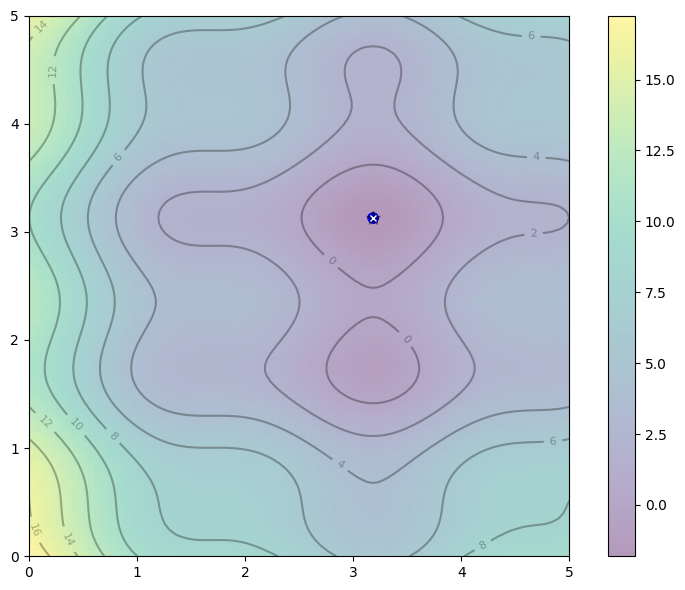

In [13]:
# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z_mesh, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.4)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x_mesh, y_mesh, z_mesh, 10, colors='black', alpha=0.3)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
ax.set_xlim([0,5])
ax.set_ylim([0,5])
pbest_plot = ax.scatter(pbest[0,:], pbest[1,:], marker='o', color='black', alpha=0.4)
p_plot = ax.scatter(x[0,:], x[1,:], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(x[0,:], x[1,:], v[0,:], v[1,:], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0,:]], [gbest[1,:]], marker='*', s=100, color='black', alpha=0.4)

In [14]:
print(objective_next)
print(gbest)
print(iter)

[-1.80795011 -1.80790299 -1.80819418 -1.8079982  -1.8082991  -1.80809711
 -1.80820073 -1.80820615 -1.80772154 -1.80811934 -1.80825641 -1.80832177
 -1.80831204 -1.80830529 -1.8082403  -1.80801027 -1.80813089 -1.80815389
 -1.80822425 -1.80825628]
[[3.18479841]
 [3.12797259]]
56
